In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [ ]:
from google.colab import files
files.upload()

Saving driver-data.csv to driver-data.csv


{'driver-data.csv': b'id,mean_dist_day,mean_over_speed_perc\n3423311935,71.24,28\n3423313212,52.53,25\n3423313724,64.54,27\n3423311373,55.69,22\n3423310999,54.58,25\n3423313857,41.91,10\n3423312432,58.64,20\n3423311434,52.02,8\n3423311328,31.25,34\n3423312488,44.31,19\n3423311254,49.35,40\n3423312943,58.07,45\n3423312536,44.22,22\n3423311542,55.73,19\n3423312176,46.63,43\n3423314176,52.97,32\n3423314202,46.25,35\n3423311346,51.55,27\n3423310666,57.05,26\n3423313527,58.45,30\n3423312182,43.42,23\n3423313590,55.68,37\n3423312268,55.15,18\n3423314255,43.84,22\n3423311976,59.26,32\n3423312669,37.14,41\n3423310697,64.3,29\n3423312113,45.75,16\n3423313343,45.97,23\n3423311431,56.04,39\n3423310755,33.64,45\n3423311821,41.67,33\n3423314359,50.68,39\n3423313106,54.22,35\n3423310754,56.2,29\n3423310524,46.16,41\n3423311780,50.22,24\n3423312156,49.66,33\n3423312916,38.61,37\n3423310588,55.28,36\n3423312995,57.87,41\n3423313389,61.69,12\n3423311369,37.41,21\n3423311408,53.83,32\n3423311598,62.98,2

In [ ]:
df = pd.read_csv("driver-data.csv")

In [ ]:
df.head(5)

,id,mean_dist_day,mean_over_speed_perc
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4000 non-null   int64  
 1   mean_dist_day         4000 non-null   float64
 2   mean_over_speed_perc  4000 non-null   int64  
dtypes: float64(1), int64(2)
memory usage: 93.9 KB


In [ ]:
df.describe()

,id,mean_dist_day,mean_over_speed_perc
count,4.000000e+03,4000.000000,4000.000000
mean,3.423312e+09,76.041522,10.721000
std,1.154845e+03,53.469563,13.708543
min,3.423310e+09,15.520000,0.000000
25%,3.423311e+09,45.247500,4.000000
50%,3.423312e+09,53.330000,6.000000
75%,3.423313e+09,65.632500,9.000000
max,3.423314e+09,244.790000,100.000000


In [ ]:
df.isnull().sum()

id                      0
mean_dist_day           0
mean_over_speed_perc    0
dtype: int64

In [ ]:
df_updated = df.drop('id', axis=1)

In [ ]:
df_updated.head(5)

,mean_dist_day,mean_over_speed_perc
0,71.24,28
1,52.53,25
2,64.54,27
3,55.69,22
4,54.58,25


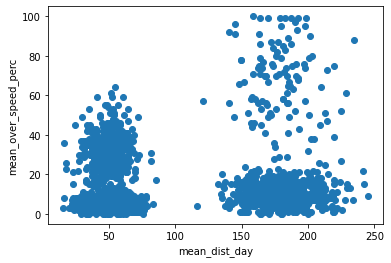

In [55]:
plt.scatter(df_updated['mean_dist_day'], df_updated['mean_over_speed_perc'])
plt.xlabel('mean_dist_day')
plt.ylabel('mean_over_speed_perc')
plt.show()

##### **Elbow curve**

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(df_updated)
    wcss.append(kmeans.inertia_)

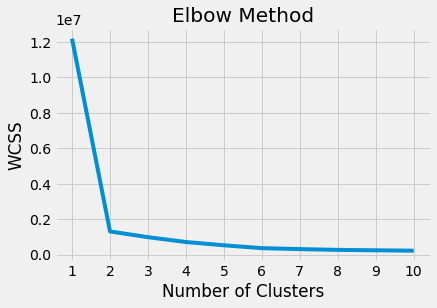

In [57]:
# plot the elbow curve
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11))
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

**Кількість кластерів: 2**

In [ ]:
kmeans_2 = KMeans(n_clusters=2)
kmeans_2.fit(df_updated)
inertia_2 = kmeans_2.inertia_

**Кількість кластерів: 3**

In [ ]:
kmeans_3 = KMeans(n_clusters=3)
kmeans_3.fit(df_updated)
inertia_3 = kmeans_3.inertia_

##### **Порівняння inertia_ для кожної кількості кластерів**

In [ ]:
# Порівняння inertia_ для кожної кількості кластерів
print("Inertia для 2 кластерів:", inertia_2)
print("Inertia для 3 кластерів:", inertia_3)

Inertia для 2 кластерів: 1316420.8509477177
Inertia для 3 кластерів: 992634.0606702471
